# Image Classification

Before diving into object detection, it's useful to understand **image classification**, one of the most fundamental tasks in computer vision.

**Image classification** involves assigning a single label to an entire image. For example, given an image, a classification model might predict whether it contains a **cat**, **dog**, or **car**.

This task is typically performed using **Convolutional Neural Networks (CNNs)**, which can learn to recognize patterns such as edges, textures, and shapes. These features help the model understand what kind of object is present in the image.

<p align="center">
  <img src="https://goodboychan.github.io/images/copied_from_nb/image/cnn_result.png" width="900"/>
</p>

In the image above, a classifier might correctly label the first image as **cat** and the second as **dog**.

However, what if both a cat and a dog appear in the same image? Or what if we need to know **where** in the image these objects are?


## Why Image Classification Is Not Enough

While classification tells us **what** is in an image, it does **not** tell us **where** the object is located.

Consider the example below:

<p align="center">
  <img src="https://imerit.net/wp-content/uploads/2023/04/Feature_Real-Time-Object-Detection-Using-YOLO.jpg" width="700"/>
</p>

In this image, there are multiple objects (people, cars, traffic lights). An image classification model can only predict one label — for example, "person" — and cannot provide information about **how many people** there are or **where** they appear in the image.

This is where **object detection** comes in.

Object detection extends classification by not only identifying the objects in an image but also **localizing** them using **bounding boxes**.

In the next section, we will explore **YOLO (You Only Look Once)**, a popular and powerful real-time object detection model.

---

# Introduction to YOLO for Object Detection

In this notebook, we will use **YOLO (You Only Look Once)**, a state-of-the-art object detection model. YOLO is widely recognized for its balance of speed and accuracy, making it one of the most effective models for real-time object detection.

YOLO performs object detection by predicting bounding boxes and class probabilities directly from full images in a single forward pass of the neural network, hence the name **"You Only Look Once."**

Object detection enables us to not only identify objects in an image but also localize their positions.


## How Are Images Annotated for Object Detection?

To train an object detection model, we need more than just image-level labels — we need to know **where** each object is in the image and **what** it is.

This is done through a process called **annotation**.

### What Is an Annotation?

An annotation for object detection typically includes:

- A **bounding box**: A rectangle that encloses the object.
- A **class label**: The name or ID of the object inside the bounding box.

For example, in an image with two people and one car, the annotations might look like this:

image1.jpg

1 0.45 0.60 0.30 0.50 # person

1 0.20 0.30 0.25 0.40 # person

2 0.75 0.65 0.30 0.20 # car


Each line represents one object and contains:

[class_id] [x_center] [y_center] [width] [height]


All coordinates are **normalized** (i.e., values between 0 and 1), relative to the image dimensions.

This is the format used in **YOLO**. For other models, the format might differ slightly for example, [xmin,ymin,xmax,ymax] or [xmin,ymin,width,height] ,etc.

### Visualization

Here is what annotated bounding boxes look like on an image:

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:900/1*EYtn2YE7b6MTzMQyD2R3nA.jpeg" width="900"/>
</p>

Each box corresponds to a detected object, along with its class label.

Now, Lets try annotating a few images of our own!

---


# Setting up the Environment


We will work with the [Ultralytics YOLOv8](https://docs.ultralytics.com/) implementation, which offers a clean and user-friendly API for training, validation, and inference.


In [ ]:
# lets install the ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## Importing Libraries

# Download Dataset
We will mount the drive so that we can use the dataset for training purposes. You can find the dataset we will use [here](https://drive.google.com/drive/folders/1Ct6wnPraUDzci712OircgriMQ6KDEGBz?usp=sharing).

You had requested to download the dataset and upload it to your Google Drive. Please follow these steps:
* Download the dataset using the link above.
* Unzip the downloaded file.
* Locate the folder named Tomato Counting.v1-tomato.yolov8 inside the unzipped contents. Sometimes the unzip tool may nest it inside an extra directory, so make sure to extract the correct folder.
* Upload the Tomato Counting.v1-tomato.yolov8 folder directly to your Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Annotating Images of Our Own

For annotating images, we will use an online tool offered by [Roboflow](https://roboflow.com/). Roboflow provides an easy-to-use interface for labeling objects in images and exporting the annotations in formats compatible with popular object detection models like YOLO.

### Steps to Annotate Using Roboflow:

1. **Create a Free Account**  
   Go to [roboflow.com](https://roboflow.com/) and sign up for a free account.

2. **Start a New Project**  
   After logging in, click on **"Create New Project"**.  
   - Give your project a name  
   - Choose the project type as **Object Detection**  
   - Set the object classes (e.g., person, dog, bottle)

3. **Upload Your Images**  
   Upload the images you want to annotate. You can drag and drop a folder or select individual files.

4. **Label the Objects**  
   Use the bounding box tool to draw rectangles around each object of interest in the images. Assign the appropriate class label to each box.

5. **Generate the Dataset**  
   Once labeling is complete, click on **"Generate"** to process your dataset. You can choose how to split the dataset (train/valid/test).

6. **Export in YOLO Format**  
   Finally, click on **"Download Dataset"** and choose the export format as **YOLOv8**. This will give you:
   - A folder of images
   - A folder of `.txt` annotation files (one per image)
   - A `data.yaml` file describing the dataset

You can now use this annotated dataset directly to train your YOLO model.

In the next section, we’ll see how to load this dataset and begin training.

---


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from google.colab import drive
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting up the Dataset




In [ ]:
dataset_path = "/content/drive/MyDrive/Tomato Counting.v1-tomato.yolov8"

dataset_yaml_path = os.path.join(dataset_path, "data.yaml")

test_folder_path = os.path.join(dataset_path, "test")
test_images = np.sort(os.listdir(os.path.join(test_folder_path, "images")))

In [ ]:
def show_image(test_folder_path):
    test_images = os.listdir(os.path.join(test_folder_path, "images"))
    random_idx = np.random.randint(0, len(test_images))
    image = test_images[random_idx]

    image_path = os.path.join(test_folder_path, "images", image)
    label_path = os.path.join(test_folder_path, "labels", image.replace(".jpg", ".txt"))

    # Load image
    img = Image.open(image_path).convert('RGB')
    img_width, img_height = img.size

    # Read label
    label = pd.read_csv(label_path, sep=" ", header=None)
    label.columns = ["class", "x_center", "y_center", "width", "height"]

    # Draw bounding boxes
    draw = ImageDraw.Draw(img)
    for i in range(len(label)):
        x_center, y_center, width, height = label.iloc[i, 1:]

        # Convert normalized coordinates to absolute pixel values
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=2)

    return img


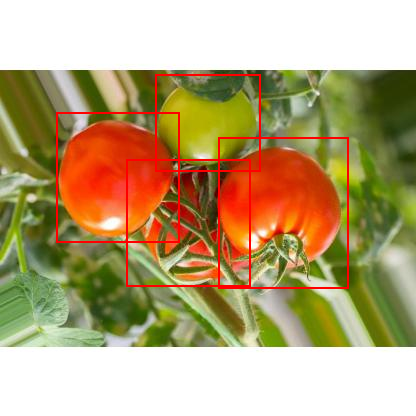

In [ ]:
show_image(test_folder_path)

Before training with YOLO, it's important to organize your dataset in a format that Ultralytics expects. The folder structure should look like this:

```
dataset/
├── test/
│ ├── images/
│ │ ├── img1.jpg
│ │ ├── img2.jpg
│ │ └── ...
│ └── labels/
│ ├── img1.txt
│ ├── img2.txt
│ └── ...
├── train/
│ ├── images/
│ │ ├── img1.jpg
│ │ ├── img2.jpg
│ │ └── ...
│ └── labels/
│ ├── img1.txt
│ ├── img2.txt
│ └── ...
```


### Important Guidelines:
- Every image must have a corresponding `.txt` file in the `labels` directory with the **same name** (e.g., `img1.jpg` ↔ `img1.txt`).
- Annotation files should follow the YOLO format:  ```<class_id> <x_center> <y_center> <width> <height>```
- All values should be **normalized** between 0 and 1 relative to the image width and height.
- The `train` and `val` folders should be clearly separated. You can also include a `test` folder if you wish to evaluate the model on unseen data.
- Avoid corrupt or mismatched files. Every image in the `images` folder must have a label file, and vice versa.

With this structure in place, you’ll be able to train YOLO models using Ultralytics with minimal friction.

## Loading a YOLO Model

We will now be using the YOLOv8 model for object detection. You might wonder, why 'v8'? Yes, there are multiple versions of YOLO models available, with over a dozen released so far. Each version comes with improvements in accuracy, speed, or specific use cases.

To learn more about the different YOLO versions and their capabilities, you can visit the [Ultralytics documentation](https://docs.ultralytics.com/models/).


In [ ]:
yolo_model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.5MB/s]


In [ ]:
yolo_model.train(data=dataset_yaml_path, epochs=50,device="cuda",batch=32,val=False, augment=True,verbose=False)
print("Model training Complete")

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Tomato Counting.v1-tomato.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 88.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 6.1±8.3 MB/s, size: 23.4 KB)


train: Scanning /content/drive/MyDrive/Tomato Counting.v1-tomato.yolov8/train/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.1±0.0 MB/s, size: 22.1 KB)


val: Scanning /content/drive/MyDrive/Tomato Counting.v1-tomato.yolov8/test/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         4G      1.741      3.082      1.837         58        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.02G       1.74      3.045      1.786         92        640: 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.21G      1.467      2.232       1.44         82        640: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.21G      1.405      1.327      1.384         84        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.21G      1.323      1.132      1.348         65        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.21G      1.415      1.184      1.407         69        640: 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.21G      1.361       1.14      1.308         84        640: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.23G      1.338      1.018       1.27         91        640: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.23G      1.302     0.9943      1.287         72        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.25G      1.316     0.9763      1.295         97        640: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.25G      1.334     0.9076      1.303         99        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.26G      1.307     0.9179      1.288         65        640: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.26G      1.309     0.8973      1.276        113        640: 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.26G      1.251      0.872      1.283         78        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.26G      1.245     0.8603      1.234         98        640: 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.26G      1.321       0.86       1.29         64        640: 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.26G       1.28     0.8414      1.245        110        640: 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.49G      1.314     0.8564      1.275        131        640: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.49G      1.275     0.8218      1.294         76        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.5G      1.278     0.8196      1.274         72        640: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.5G      1.335      0.824      1.256        104        640: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.5G      1.268     0.8235      1.269         60        640: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.5G      1.207     0.8629       1.25         48        640: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.52G      1.253     0.7921      1.229        106        640: 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.52G      1.246     0.7806      1.266        107        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.52G      1.283     0.7741      1.255         70        640: 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.52G       1.22     0.7503      1.219        111        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.54G      1.209     0.7429      1.211         82        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.54G      1.206     0.7744      1.241         65        640: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.54G      1.109     0.7234      1.191         53        640: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.54G      1.182     0.7578      1.221         92        640: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.55G      1.206     0.7304      1.231         94        640: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.55G      1.136     0.7041      1.192         85        640: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.55G      1.167     0.6887       1.17        136        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.55G      1.198     0.6784      1.211         95        640: 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.57G      1.158     0.6893      1.198         63        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.57G      1.106      0.665      1.168         93        640: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.57G      1.076      0.669      1.172         75        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.57G      1.079     0.6451      1.191         80        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.59G      1.118     0.6749      1.185         76        640: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.59G      1.094     0.6246      1.157         62        640: 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.59G      1.061     0.5922      1.148         42        640: 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.59G      1.041     0.6135      1.141         43        640: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.59G       1.06     0.5695      1.144         58        640: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.59G      1.087      0.619      1.142         96        640: 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.59G       1.02     0.5513      1.137         64        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.59G      1.024     0.5685      1.128         39        640: 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.59G      1.027     0.5553      1.148         45        640: 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.59G      1.017     0.5651      1.108         45        640: 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.59G      1.006     0.5456      1.114         48        640: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


                   all         45        236      0.975      0.987      0.979      0.646

50 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


                   all         45        236      0.965      0.992       0.98      0.647
Speed: 0.2ms preprocess, 7.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train
Model training Complete


In [ ]:
results = yolo_model.val(data=dataset_yaml_path,verbose=False)

Ultralytics 8.3.147 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 13.5±3.5 MB/s, size: 23.0 KB)


val: Scanning /content/drive/MyDrive/Tomato Counting.v1-tomato.yolov8/test/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


                   all         45        236      0.965      0.992       0.98      0.648
Speed: 0.2ms preprocess, 24.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
for metrics, val in results.results_dict.items():
  print(f"{metrics}: {val:.3f}")

metrics/precision(B): 0.965
metrics/recall(B): 0.992
metrics/mAP50(B): 0.980
metrics/mAP50-95(B): 0.648
fitness: 0.681


In [ ]:
results.to_df()

,class_name,box-p,box-r,box-f1,box-map,box-map50,box-map75
0,tomato,0.965148,0.991525,0.978159,0.647787,0.980027,0.771259


In [ ]:
def show_image_with_prediction(test_folder_path,yolo_model):
    test_images = os.listdir(os.path.join(test_folder_path, "images"))
    random_idx = np.random.randint(0, len(test_images))
    image = test_images[random_idx]

    image_path = os.path.join(test_folder_path, "images", image)
    label_path = os.path.join(test_folder_path, "labels", image.replace(".jpg", ".txt"))

    # Load image
    img = Image.open(image_path).convert('RGB')
    img_width, img_height = img.size

    # Read label
    label = pd.read_csv(label_path, sep=" ", header=None)
    label.columns = ["class", "x_center", "y_center", "width", "height"]

    predicted = yolo_model(img)[0]
    predicted = predicted.boxes.data.cpu().numpy()
    draw = ImageDraw.Draw(img)

    # Draw bounding boxes
    for x_min, y_min, x_max, y_max, confidence, class_id in predicted:
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="yellow", width=2)

    for i in range(len(label)):
        x_center, y_center, width, height = label.iloc[i, 1:]

        # Convert normalized coordinates to absolute pixel values
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=2)

    return img

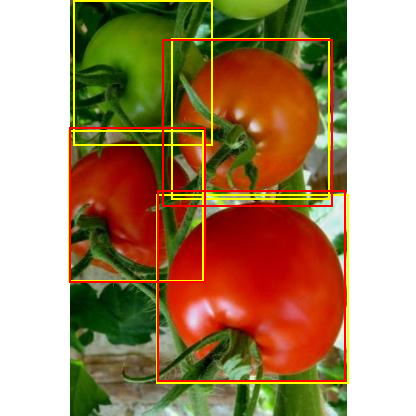

In [ ]:
show_image_with_prediction(test_folder_path,yolo_model)